<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


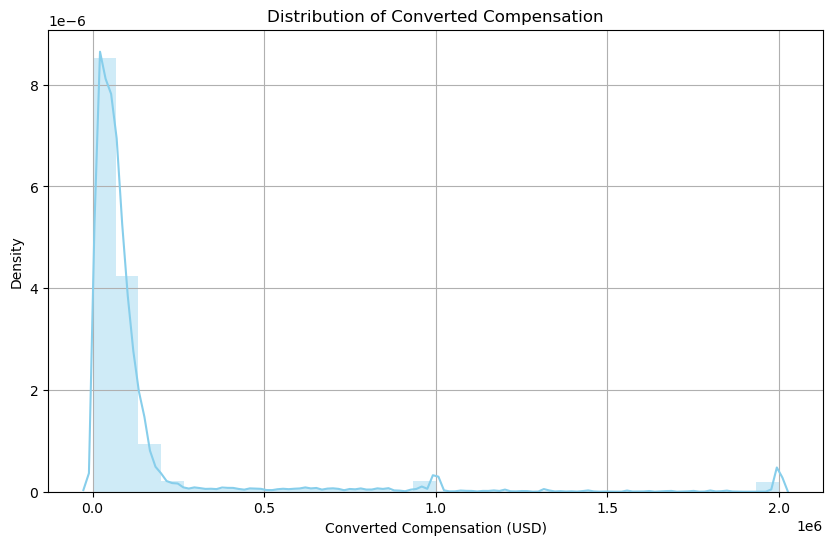

In [18]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a column named 'ConvertedComp'

# Remove missing values from the 'ConvertedComp' column
df_clean = df.dropna(subset=['ConvertedComp'])

# Plot the distribution curve using distplot
plt.figure(figsize=(10, 6))
sns.distplot(df_clean['ConvertedComp'], kde=True, hist=True, color='skyblue', bins=30)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.show()


Plot the histogram for the column `ConvertedComp`.


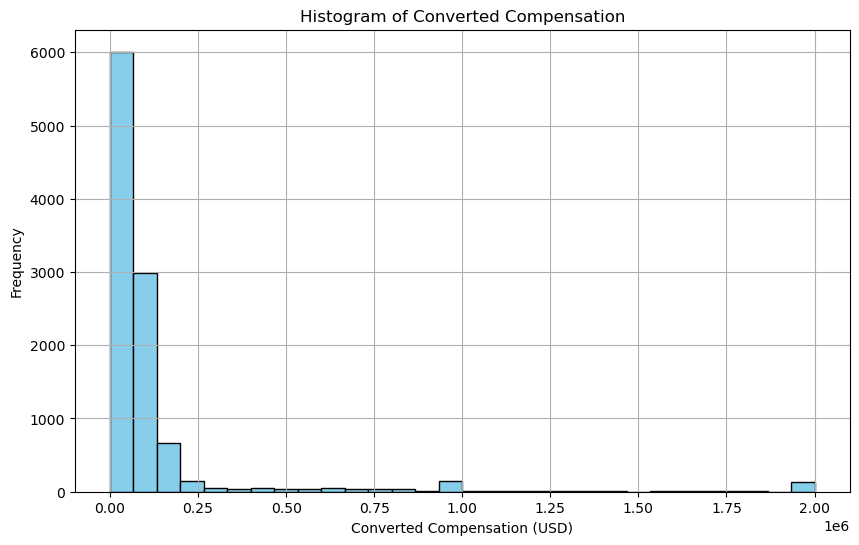

In [4]:
# your code goes here
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a column named 'ConvertedComp'
# Remove any rows with missing values in the 'ConvertedComp' column
df_cleaned = df.dropna(subset=['ConvertedComp'])

# Plot the histogram for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
median_of_ConvertedComp = df['ConvertedComp'].median()

How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
res_man = df[df['Gender']=='Man']

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [21]:
# your code goes here
res_women = df[df['Gender']=='Women']
#df['Age'].median()
res_women['ConvertedComp'].median()

nan

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
# your code goes here
five_summary = df['Age'].describe()
print(five_summary[['min', '25%', '50%', '75%', 'max']])

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


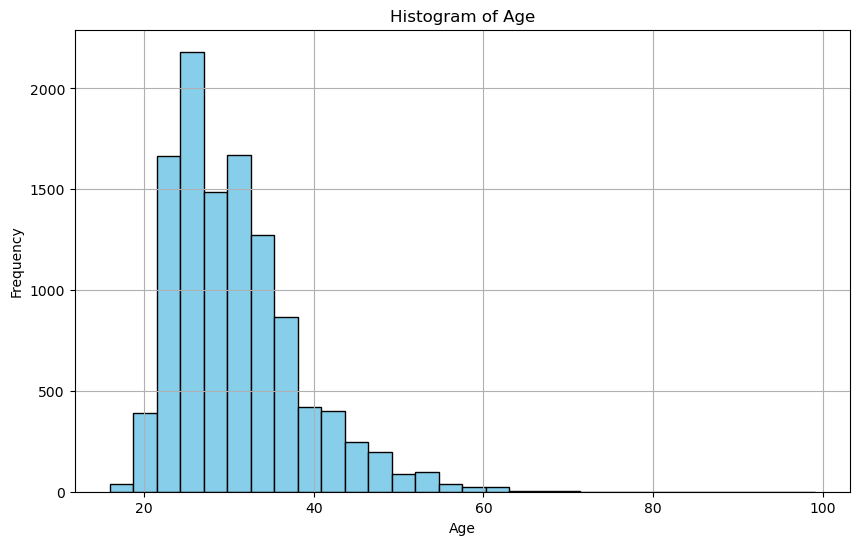

In [23]:
# your code goes here
import matplotlib.pyplot as plt


# Drop missing values from the 'Age' column
df_cleaned = df.dropna(subset=['Age'])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Outliers


### Finding outliers


In [26]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with a column named 'ConvertedComp'

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the mean 'ConvertedComp' after removing outliers
mean_converted_comp_after = df_no_outliers['ConvertedComp'].mean()

print("Mean ConvertedComp after removing outliers:", mean_converted_comp_after)


Mean ConvertedComp after removing outliers: 59883.20838915799


Find out if outliers exist in the column `ConvertedComp` using a box plot?


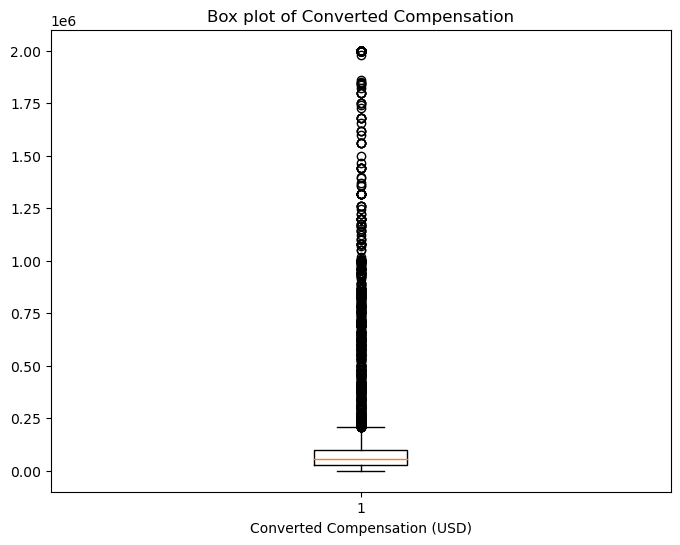

In [10]:
# your code goes here
import matplotlib.pyplot as plt
# Drop missing values from the 'ConvertedComp' column
df_clean = df.dropna(subset=['ConvertedComp'])

# Plot a box plot to identify outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df_clean['ConvertedComp'])
plt.title('Box plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# your code goes here
df_clean = df.dropna(subset=['ConvertedComp'])
Q1 = df_clean['ConvertedComp'].quantile(0.25)
Q3 = df_clean['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
IQR

73132.0

Find out the upper and lower bounds.


In [12]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
# your code goes here
outliers = df_clean[(df_clean['ConvertedComp'] < lower_bound) | (df_clean['ConvertedComp'] > upper_bound)]
#outliers

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [14]:
# your code goes here
new_df = df_clean[(df_clean['ConvertedComp'] >= lower_bound) & (df_clean['ConvertedComp'] <= upper_bound)]
#new_df

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [27]:
# your code goes here
numerical_columns = ['Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs']
for col in numerical_columns:
    correlation = df['Age'].corr(df[col])
    print(f"Correlation between 'Age' and {col}: {correlation}")

Correlation between 'Age' and Respondent: 0.00404103082877395
Correlation between 'Age' and CompTotal: 0.00696993309679573
Correlation between 'Age' and ConvertedComp: 0.10538616072629153
Correlation between 'Age' and WorkWeekHrs: 0.03651764909319559
Correlation between 'Age' and CodeRevHrs: -0.020469111970031026


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
